# Bus 9430 Project - Understanding Hotel Cancellation 


#### **I. Data summary**
The data was originally extracted and collected from hotels’ Property Management System (PMS) SQL databases, and published with the article Hotel Booking Demand Datasets [1], written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. There are two datasets in the article. The first dataset(H1) is the bookings of resort hotel data, and the second dataset(H2) is the bookings of city hotel data. They detail bookings between the 1st of July in 2015 and the 31st of August in 2017, which includes bookings that were completed and bookings that were canceled.
<br>
<br>
# **Data cleaning in Excel**
1. We combine "H1.csv" and "H2.csv" into one dataset(dataset.csv), and we add one column "HotelType" to indicate the type of hotel -- city or resort.  
2. Since the missing values in "Agent" and "Company" are written as "       NULL" which are in incorrect format. Therefore, we edit the missing values into blank cell.

In [ ]:
#Packages required
import pandas as pd
7
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving dataset_withArrivalDate.csv to dataset_withArrivalDate.csv


In [ ]:
import io
dataH1H2 = pd.read_csv(io.BytesIO(uploaded['dataset_withArrivalDate.csv']))

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving weather.csv to weather.csv


In [ ]:
weather = pd.read_csv(io.BytesIO(uploaded['weather.csv']))

In [ ]:
dataH1H2.head()


,HotelType,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,ArrivalDate,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,City,0,6,2015,July,27,1,7/1/2015,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient,0.0,0,0,Check-Out,7/3/2015
1,City,1,88,2015,July,27,1,7/1/2015,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,7/1/2015
2,City,1,65,2015,July,27,1,7/1/2015,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,68.0,0,1,Canceled,4/30/2015
3,City,1,92,2015,July,27,1,7/1/2015,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.5,0,2,Canceled,6/23/2015
4,City,1,100,2015,July,27,2,7/2/2015,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,4/2/2015


In [ ]:
dataH1H2.shape

(119390, 33)

In [ ]:
dataH1H2 = dataH1H2.rename(columns={"ArrivalDate":"Date"})

In [ ]:
weather.head()

,Date,Max Temperature (° F),Avg Temperature (° F),Min Temperature (° F),Max Dew Point (° F),Avg Dew Point (° F),Min Dew Point (° F),Max Humidity (%),Avg Humidity (%),Min Humidity (%),MaxWind Speed (mph),Avg Wind Speed (mph),Min Wind Speed (mph),Max Pressure (Hg),Avg Pressure (Hg),Min Pressure (Hg),Precipitation (in)
0,11/1/2014,70,64.3,60,65,62.4,58,100,80.7,0,9,5.3,2,29.9,29.8,29.8,0
1,11/2/2014,65,61.9,57,59,54.8,51,99,78.6,61,9,5.8,2,29.8,29.8,29.7,0
2,11/3/2014,66,60.5,57,63,58.3,55,100,79.6,0,20,10.1,0,29.7,28.3,0.0,0
3,11/4/2014,60,53.8,50,55,49.0,43,100,76.8,0,18,9.5,4,29.6,29.4,29.4,0
4,11/5/2014,62,54.8,51,51,47.5,46,88,76.9,57,11,8.6,7,29.7,29.6,29.6,0


In [ ]:
weather.shape

(1063, 17)

Merge two datasets

In [ ]:
data = pd.merge(weather, dataH1H2, on="Date", how="right")

In [ ]:
data.head()

,Date,Max Temperature (° F),Avg Temperature (° F),Min Temperature (° F),Max Dew Point (° F),Avg Dew Point (° F),Min Dew Point (° F),Max Humidity (%),Avg Humidity (%),Min Humidity (%),MaxWind Speed (mph),Avg Wind Speed (mph),Min Wind Speed (mph),Max Pressure (Hg),Avg Pressure (Hg),Min Pressure (Hg),Precipitation (in),HotelType,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,7/1/2015,74,67.6,63,72,63.2,60,100,85.9,66,16,6.6,0,29.7,29.6,29.6,0,City,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient,0.0,0,0,Check-Out,7/3/2015
1,7/1/2015,74,67.6,63,72,63.2,60,100,85.9,66,16,6.6,0,29.7,29.6,29.6,0,City,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,7/1/2015
2,7/1/2015,74,67.6,63,72,63.2,60,100,85.9,66,16,6.6,0,29.7,29.6,29.6,0,City,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,68.0,0,1,Canceled,4/30/2015
3,7/1/2015,74,67.6,63,72,63.2,60,100,85.9,66,16,6.6,0,29.7,29.6,29.6,0,City,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.5,0,2,Canceled,6/23/2015
4,7/1/2015,74,67.6,63,72,63.2,60,100,85.9,66,16,6.6,0,29.7,29.6,29.6,0,City,1,257,2015,July,27,1,0,2,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,1,0,A,A,0,No Deposit,6.0,NaN,0,Transient,101.5,0,0,Canceled,6/16/2015


In [ ]:
data["ArrivalDateYear"].unique()

array([2015, 2016, 2017])

In [ ]:
# Data dimension
data.shape

(119390, 49)

In [ ]:
# missing values of each column
data.isnull().sum().sort_values(ascending=False)

Company                        112593
Agent                           16340
Country                           488
Children                            4
ReservationStatusDate               0
Avg Wind Speed (mph)                0
LeadTime                            0
IsCanceled                          0
HotelType                           0
Precipitation (in)                  0
Min Pressure (Hg)                   0
Avg Pressure (Hg)                   0
Max Pressure (Hg)                   0
Min Wind Speed (mph)                0
MaxWind Speed (mph)                 0
ArrivalDateMonth                    0
Min Humidity (%)                    0
Avg Humidity (%)                    0
Max Humidity (%)                    0
Min Dew Point (° F)                 0
Avg Dew Point (° F)                 0
Max Dew Point (° F)                 0
Min Temperature (° F)               0
Avg Temperature (° F)               0
Max Temperature (° F)               0
ArrivalDateYear                     0
StaysInWeeke

In [ ]:
# Summary of dataset
data.describe()

,Max Temperature (° F),Avg Temperature (° F),Min Temperature (° F),Max Dew Point (° F),Avg Dew Point (° F),Min Dew Point (° F),Max Humidity (%),Avg Humidity (%),Min Humidity (%),MaxWind Speed (mph),Avg Wind Speed (mph),Min Wind Speed (mph),Max Pressure (Hg),Avg Pressure (Hg),Min Pressure (Hg),Precipitation (in),IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,Agent,Company,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.0,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,72.397052,64.028750,56.900821,56.749669,52.658665,47.863875,86.414608,69.109217,44.657911,13.173733,8.038118,3.354661,29.763544,29.543186,27.787728,0.0,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,11.026624,8.427497,9.676835,6.523791,6.762700,8.139467,10.797970,13.292712,19.370882,3.450739,2.479764,2.475950,0.165792,0.949065,7.208762,0.0,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,47.000000,42.000000,0.000000,30.000000,21.200000,0.000000,34.000000,22.600000,0.000000,4.000000,2.400000,0.000000,29.100000,17.400000,0.000000,0.0,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,63.000000,57.500000,52.000000,53.000000,48.700000,43.000000,82.000000,61.900000,34.000000,11.000000,6.300000,2.000000,29.700000,29.600000,29.600000,0.0,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,72.000000,64.500000,58.000000,58.000000,53.500000,49.000000,87.000000,70.200000,46.000000,13.000000,7.700000,3.000000,29.800000,29.700000,29.600000,0.0,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,80.000000,70.100000,63.000000,61.000000,57.500000,53.000000,94.000000,78.500000,58.000000,16.000000,9.700000,4.000000,29.900000,29.800000,29.700000,0.0,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,105.000000,88.200000,80.000000,72.000000,69.900000,68.000000,100.000000,100.000000,100.000000,29.000000,20.400000,16.000000,30.300000,30.200000,30.200000,0.0,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


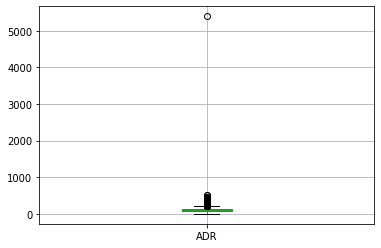

In [ ]:
#@title
data.boxplot("ADR")

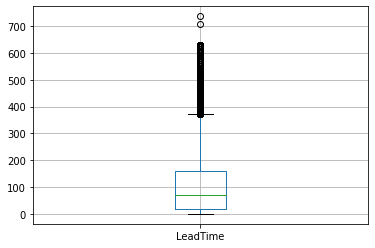

In [ ]:
data.boxplot("LeadTime")

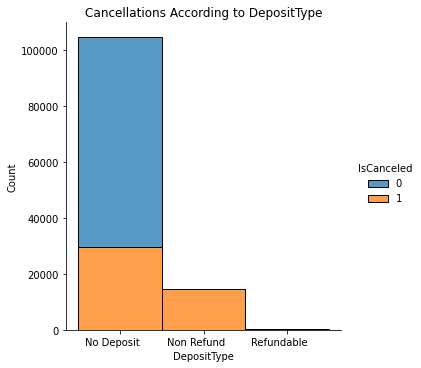

In [ ]:
sns.displot(data, x='DepositType', hue='IsCanceled', multiple='stack')
plt.title("Cancellations According to DepositType")
plt.show()

In [ ]:
data.columns

Index(['Date', 'Max Temperature (° F)', 'Avg Temperature (° F)',
       'Min Temperature (° F)', 'Max Dew Point (° F)', 'Avg Dew Point (° F)',
       'Min Dew Point (° F)', 'Max Humidity (%)', 'Avg Humidity (%)',
       'Min Humidity (%)', 'MaxWind Speed (mph)', 'Avg Wind Speed (mph)',
       'Min Wind Speed (mph)', 'Max Pressure (Hg)', 'Avg Pressure (Hg)',
       'Min Pressure (Hg)', 'Precipitation (in)', 'HotelType', 'IsCanceled',
       'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests

In [ ]:
#data cleaning 
## missing value
data.dropna(subset = ['Children', 'Country'], inplace = True)
data['Agent'] = data['Agent'].fillna(0)
data['Company'] = data['Company'].fillna(0)

##change data type
data.loc[data['Agent'] != 0, "Agent"] = 1
data.loc[data['Company'] != 0, "Company"] = 1
data['Agent'] = data['Agent'].astype('category')
data['Company'] = data['Company'].astype('category')

##drop illogical number
data.drop(data[data['Adults'] == 0].index, inplace = True)
data.drop(data[data["ADR"] >= 5000].index, inplace = True)
data.drop(data[data["LeadTime"] >= 700].index, inplace = True)
data.drop(['Precipitation (in)'], axis=1, inplace = True)
data.drop(['DepositType'], axis=1, inplace = True)


##drop unnecessary columns
data.drop(['Max Temperature (° F)', 'Min Temperature (° F)', 'Max Dew Point (° F)', 'Min Dew Point (° F)'], axis=1, inplace = True)
data.drop(['Avg Dew Point (° F)', 'Avg Humidity (%)', 'Avg Wind Speed (mph)', 'Avg Pressure (Hg)', 'Max Humidity (%)', 'Min Humidity (%)', 'MaxWind Speed (mph)', 'Min Wind Speed (mph)', 'Max Pressure (Hg)', 'Min Pressure (Hg)'], axis=1, inplace = True)
data.drop(['ArrivalDateWeekNumber', 'DistributionChannel', 'ReservationStatus'], axis=1, inplace = True)
data.drop_duplicates()
data.head()

,Date,Avg Temperature (° F),HotelType,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate
0,7/1/2015,67.6,City,0,6,2015,July,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,0,0,0,A,A,0,1.0,0.0,0,Transient,0.0,0,0,7/3/2015
1,7/1/2015,67.6,City,1,88,2015,July,1,0,4,2,0.0,0,BB,PRT,Online TA,0,0,0,A,A,0,1.0,0.0,0,Transient,76.5,0,1,7/1/2015
2,7/1/2015,67.6,City,1,65,2015,July,1,0,4,1,0.0,0,BB,PRT,Online TA,0,0,0,A,A,0,1.0,0.0,0,Transient,68.0,0,1,4/30/2015
3,7/1/2015,67.6,City,1,92,2015,July,1,2,4,2,0.0,0,BB,PRT,Online TA,0,0,0,A,A,0,1.0,0.0,0,Transient,76.5,0,2,6/23/2015
4,7/1/2015,67.6,City,1,257,2015,July,1,0,2,2,0.0,0,HB,PRT,Offline TA/TO,0,1,0,A,A,0,1.0,0.0,0,Transient,101.5,0,0,6/16/2015


#### **II. Summary the dataset**

We merge weather dataset and hotel cancellation dataset by date, and the new dataset contains 119,390 instances and 49 attributes. Attributes cover the bookings information, customers information, reservation details, weather information, and our target variable -- "IsCanceled". The attribute "IsCanceled" indicates whether a booking arrived effectively and was completed or a booking was canceled. 

#### **III. Data Cleaning**

As indicated by the previous tables by using isnull and describe method, our dataset needs to be cleaned before do the exploratory data analysis.  

1. Missing value - There are 4 variables with missing values. "Children" and "Country" variables have 492 missing values in total. The "Agent" variable has around 16,000 missing values, and the "Company" variable has approximately 112,000 missing values.   
    1) "Children" and "Country" columns only contain a small number of missing values which means approximate 0.4% of observations do not have valid numbers. Hence, we drop these rows.  
    2) For "Agent" and "Company" variables, the missing values indicate there is no agent or company related to the booking, so their missing values can be filled with 0, which means there is no agent or company. For those bookings with agents or companies, we replace the value into 1. Moreover, we also modify the "Agent" and "Company" as categorical values.  

2. Illogical observations - "Adults" contains minimum values of 0, which is illogical. Therefore, we delete all these rows. The column "Precipitation (in)" are all 0, therefore, we delete this column. Also, there is 100% cancellation rate for the "Non Refund" in "DepositType" column, which doesn't make sense, and illogic. There might be mistake when people collected the data, so we delete the column.

3. Outliers - There is outliers in the "ADR" that is over 5000, and there are two outliers in the "LeadTime" that are greater than 700. Therefore, we drop these three outliers. 

4. Unnecessary columns - We only keep the average temperature column in the weather dataset. Since we have column "date" to determine the date of the booking, we drop those columns related to arrival date. Last, the column "ReservationStatus" determines the same issues as the target variable "IsCanceled", threfore, we drop the column to reduce bias in the modeling section. As a result, there are 118,502 instances, and 30 attributes left.

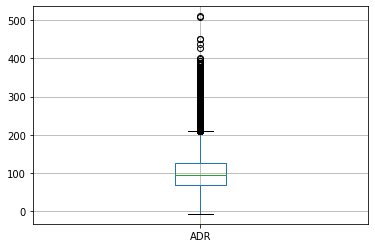

In [ ]:
data.boxplot("ADR")

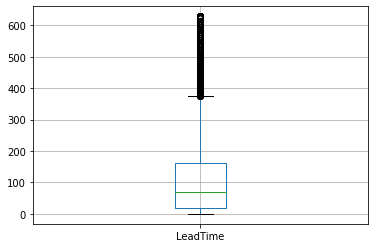

In [ ]:
data.boxplot("LeadTime")

In [ ]:
# Data dimension after data cleaning
data.shape

(118502, 30)

In [ ]:
data["Adults"] == 0

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: Adults, Length: 118502, dtype: bool

In [ ]:
data.describe()

,Avg Temperature (° F),IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,118502.000000,118502.000000,118502.000000,118502.000000,118502.000000,118502.000000,118502.000000,118502.000000,118502.000000,118502.000000,118502.000000,118502.000000,118502.000000,118502.000000,118502.000000,118502.000000,118502.000000,118502.000000
mean,64.047067,0.371749,104.353159,2016.157499,15.798982,0.928162,2.500658,1.864551,0.100732,0.007949,0.031645,0.087357,0.131854,0.218503,2.335083,102.129338,0.062016,0.570927
std,8.422598,0.483274,106.901787,0.707715,8.780453,0.992667,1.889058,0.569540,0.390806,0.097414,0.175054,0.847209,1.486702,0.638385,17.649577,47.996933,0.244418,0.792266
min,42.000000,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,57.500000,0.000000,18.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,64.500000,0.000000,69.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,70.100000,1.000000,161.000000,2017.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,88.200000,1.000000,629.000000,2017.000000,31.000000,16.000000,40.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,510.000000,8.000000,5.000000


In [ ]:
data.columns

Index(['Date', 'Avg Temperature (° F)', 'HotelType', 'IsCanceled', 'LeadTime',
       'ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'ReservedRoomType', 'AssignedRoomType', 'BookingChanges', 'Agent',
       'Company', 'DaysInWaitingList', 'CustomerType', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'ReservationStatusDate'],
      dtype='object')

# **Exploratory Data Analysis**

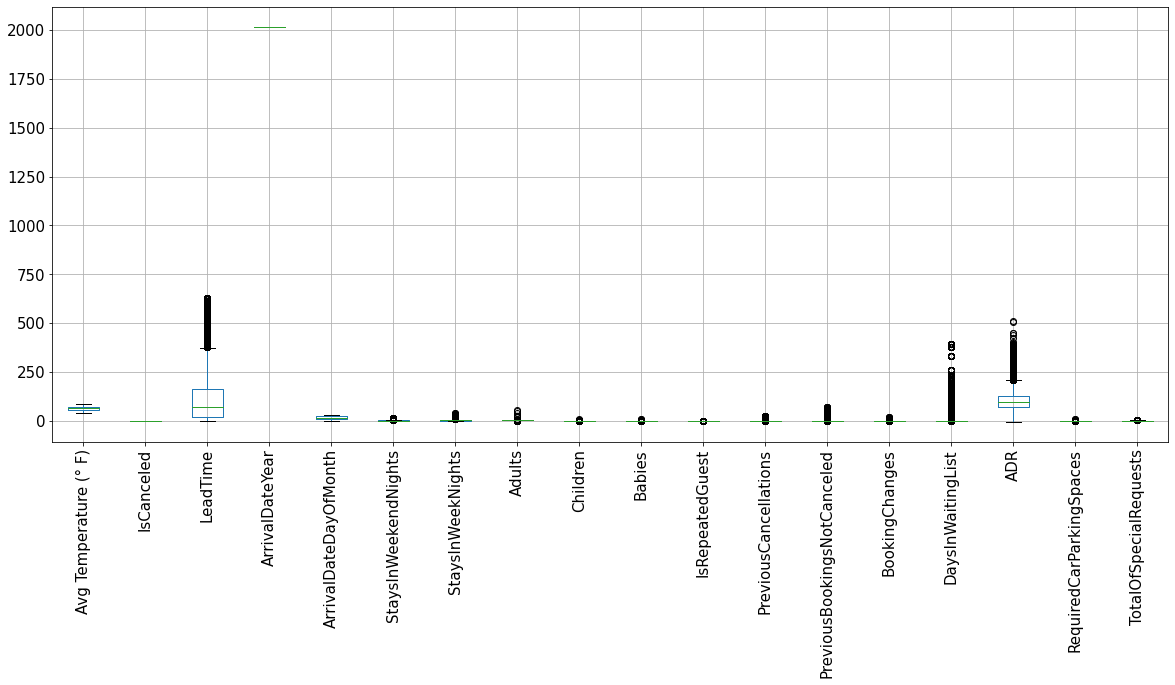

In [ ]:
data.boxplot(figsize=(20,8), fontsize=15)
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
data["IsCanceled"].value_counts() # 0 - not canceld / 1- canceled

0    74449
1    44053
Name: IsCanceled, dtype: int64

In [ ]:
display(data["Country"].value_counts(normalize=True)*100)

PRT    40.871884
GBR    10.214174
FRA     8.755970
ESP     7.211693
DEU     6.135761
         ...    
BHS     0.000844
NAM     0.000844
AIA     0.000844
HND     0.000844
NCL     0.000844
Name: Country, Length: 177, dtype: float64

In [ ]:
display(data["IsRepeatedGuest"].value_counts(normalize=True)*100)

0    96.835496
1     3.164504
Name: IsRepeatedGuest, dtype: float64

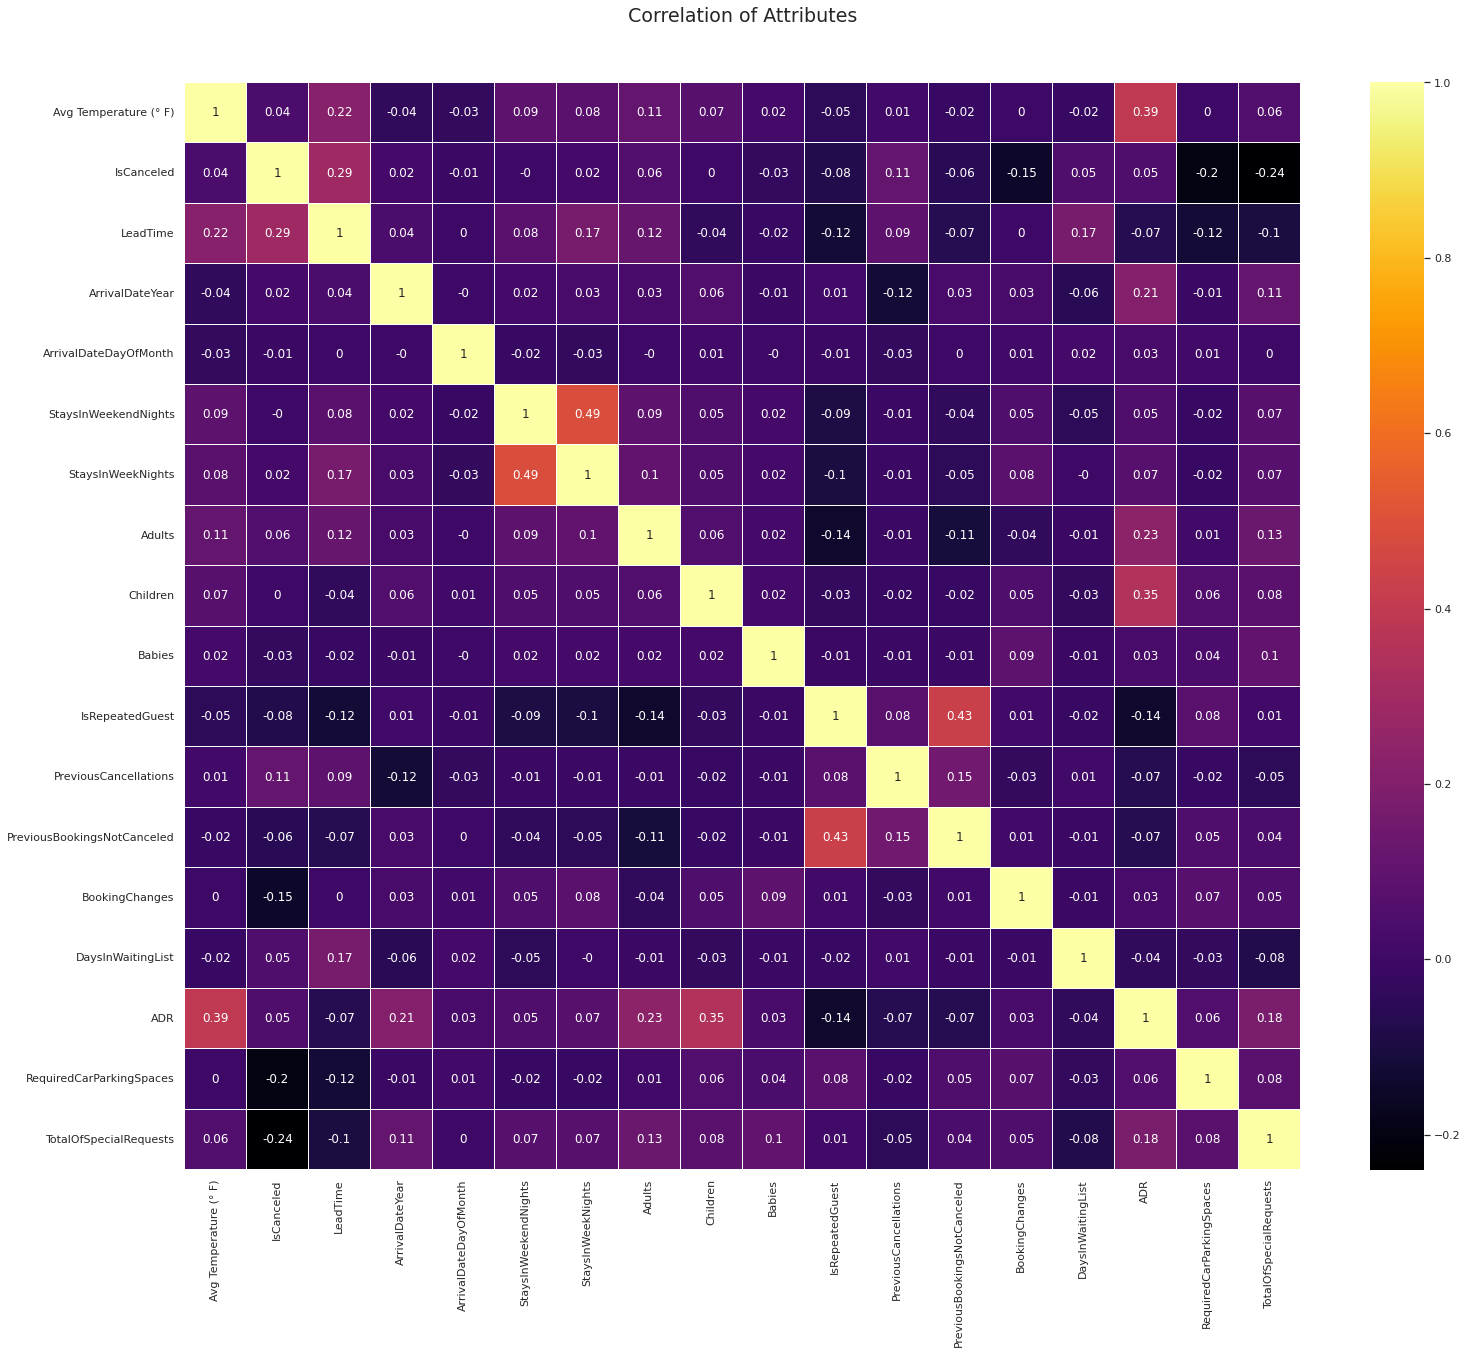

In [ ]:
plt.figure(figsize=(25,20))
sns.set(font_scale=1)
plt.title('Correlation of Attributes', y=1.05, size=19)
# sns.heatmap(data.corr(),vmax=0.8,linewidth=0.1,cmap='inferno')
sns.heatmap(round(data.corr(),2), annot=True, linewidth=0.1, cmap="inferno")
plt.show()

**Observation:** There is high correlation between
- IsCanceled and LeadTime
- PreviousBookingsNotCanceled and IsRepeatedGuest
- ArrivalDateYear and ADR

<br>
ADR (Average Daily Rate) is an important indicator because it reflects the average price that customers are paying for hotel rooms on a given period of time.

In [ ]:
data.head()

,Date,Avg Temperature (° F),HotelType,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate
0,7/1/2015,67.6,City,0,6,2015,July,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,0,0,0,A,A,0,1.0,0.0,0,Transient,0.0,0,0,7/3/2015
1,7/1/2015,67.6,City,1,88,2015,July,1,0,4,2,0.0,0,BB,PRT,Online TA,0,0,0,A,A,0,1.0,0.0,0,Transient,76.5,0,1,7/1/2015
2,7/1/2015,67.6,City,1,65,2015,July,1,0,4,1,0.0,0,BB,PRT,Online TA,0,0,0,A,A,0,1.0,0.0,0,Transient,68.0,0,1,4/30/2015
3,7/1/2015,67.6,City,1,92,2015,July,1,2,4,2,0.0,0,BB,PRT,Online TA,0,0,0,A,A,0,1.0,0.0,0,Transient,76.5,0,2,6/23/2015
4,7/1/2015,67.6,City,1,257,2015,July,1,0,2,2,0.0,0,HB,PRT,Offline TA/TO,0,1,0,A,A,0,1.0,0.0,0,Transient,101.5,0,0,6/16/2015


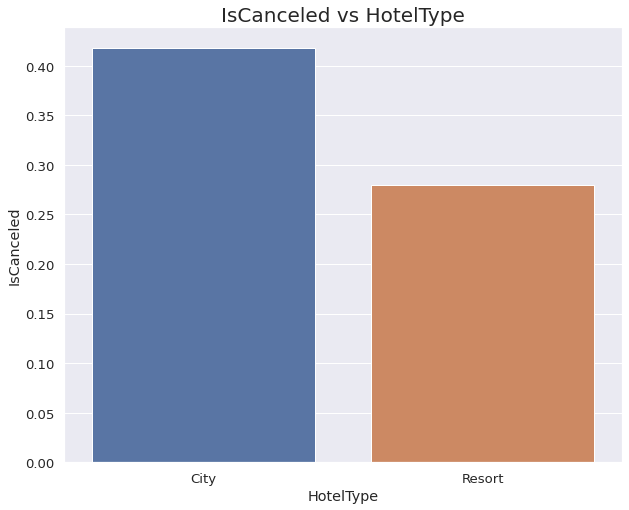

In [ ]:
# IsCanceled vs HotelType
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.barplot(x="HotelType", y="IsCanceled", data=data, ci=None)
plt.title("IsCanceled vs HotelType", size=20)
plt.show()

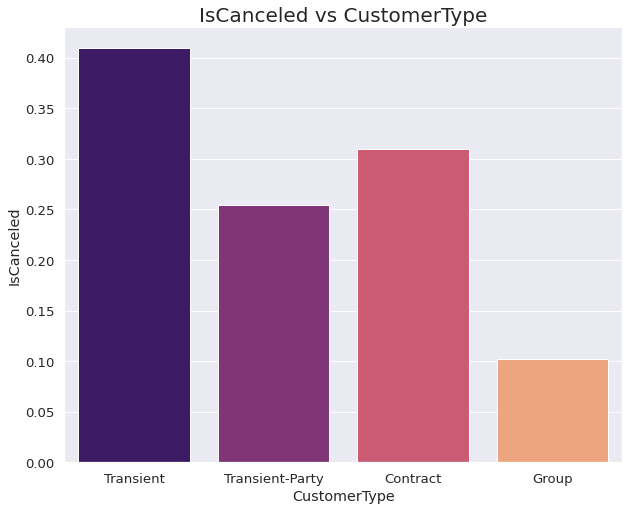

In [ ]:
# IsCanceled vs CustomerType
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.barplot(x="CustomerType", y="IsCanceled", data=data, palette = "magma", ci=None)
plt.title("IsCanceled vs CustomerType", size=20)
plt.show()

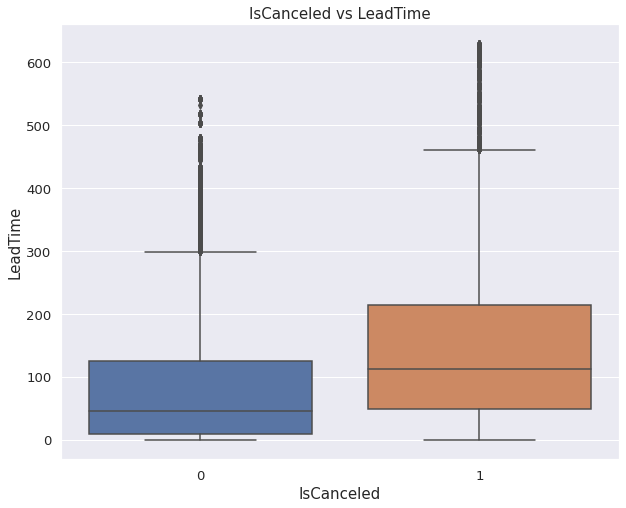

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x="IsCanceled", y='LeadTime', data=data)
plt.title('IsCanceled vs LeadTime', fontsize=15)
plt.xlabel('IsCanceled', fontsize=15)
plt.ylabel('LeadTime', fontsize=15)
plt.show()
%matplotlib inline

The median leadtime was lower for people who didn't cancel their reservation

In [ ]:
data['IsCanceled'].median()

0.0

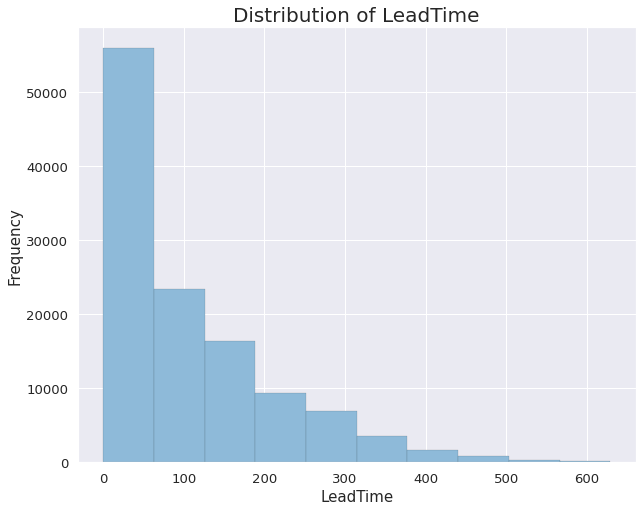

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(data['LeadTime'], edgecolor='black', linewidth=0.1, color='#8EBAD9')
plt.title('Distribution of LeadTime', fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('LeadTime', fontsize=15)
plt.show()
plt.show()

**Observation:**
The cancellation rate is highest in 2017 (39%) and it's highest in June(42%), April(41%), and May(40%)

In [ ]:
# # IsCanceled vs ArrivalDateDayOfMonth
# plt.figure(figsize=(20,10))
# sns.barplot(y="IsCanceled",x="ArrivalDateDayOfMonth", data=data, ci=None)
# plt.title("IsCanceled vs ArrivalDateDayOfMonth", size=20)
# plt.show()

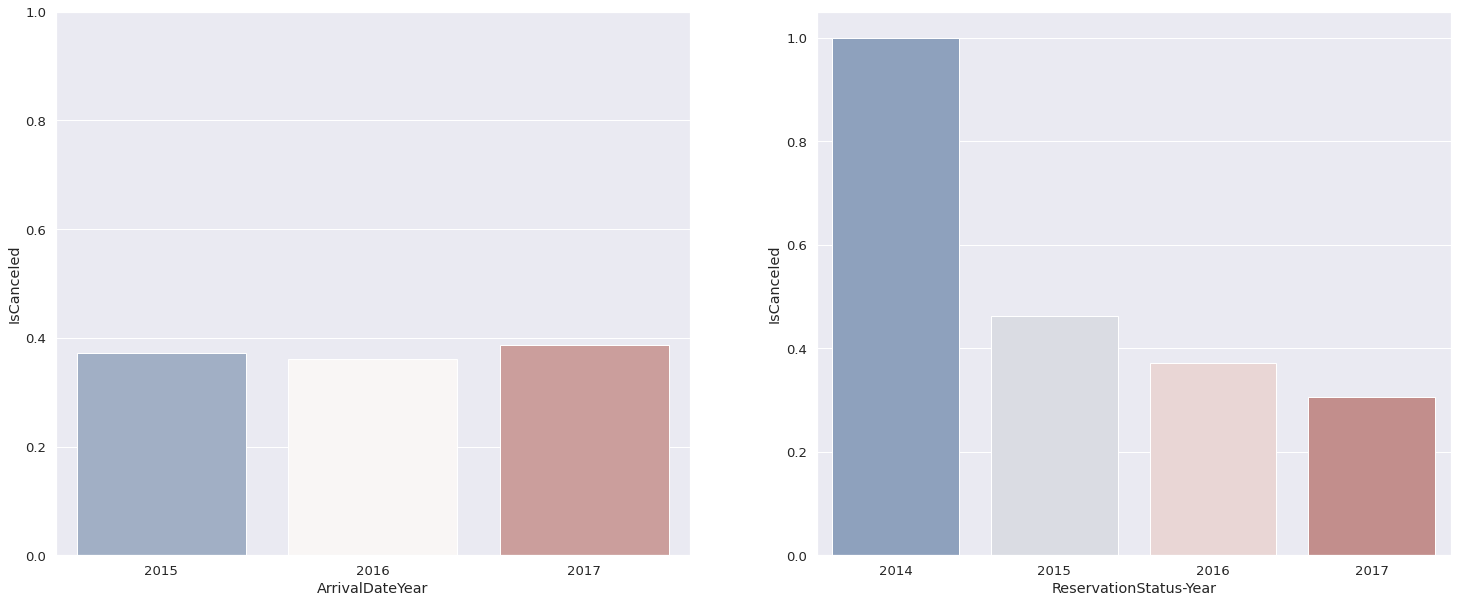

In [ ]:
# ArrivalDateYear vs ReservationStatusDate - year

fig,axes=plt.subplots(nrows=1,ncols=2, figsize=(25,10))
sns.barplot(ax=axes[0], y="IsCanceled",x="ArrivalDateYear", data=data, palette="vlag", ci=None)
axes[0].set_ylim(0, 1.0)

data["ReservationStatus-Year"] = pd.DatetimeIndex(data["ReservationStatusDate"]).year
sns.barplot(y="IsCanceled",x=data["ReservationStatus-Year"], data=data, palette="vlag", ci=None)
plt.show()

In [ ]:
# ArrivalDateMonth vs ReservationStatusDate - month
# plt.figure(figsize=(20,10))
# sns.lineplot(y="IsCanceled",x="ArrivalDateMonth", data=data, label="ArrivalDateMonth", linewidth = 5, linestyle="--", ci=None)
# data["month"] = pd.DatetimeIndex(data["ReservationStatusDate"]).month
# sns.lineplot(y=data["IsCanceled"],x=data["month"], label="ReservationStatusDate", linewidth = 5, ci=None)
# plt.show()

In [ ]:
data["month"] = pd.DatetimeIndex(data["ReservationStatusDate"]).month

In [ ]:
data["month"] = data["month"].rename({1:'January', 2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}, inplace=True)

In [ ]:
# data["month"] = pd.DatetimeIndex(data["ReservationStatusDate"]).month
# sns.lineplot(y=data["IsCanceled"],x=data["month"], label="ReservationStatusDate", linewidth = 5, ci=None)
# plt.show()

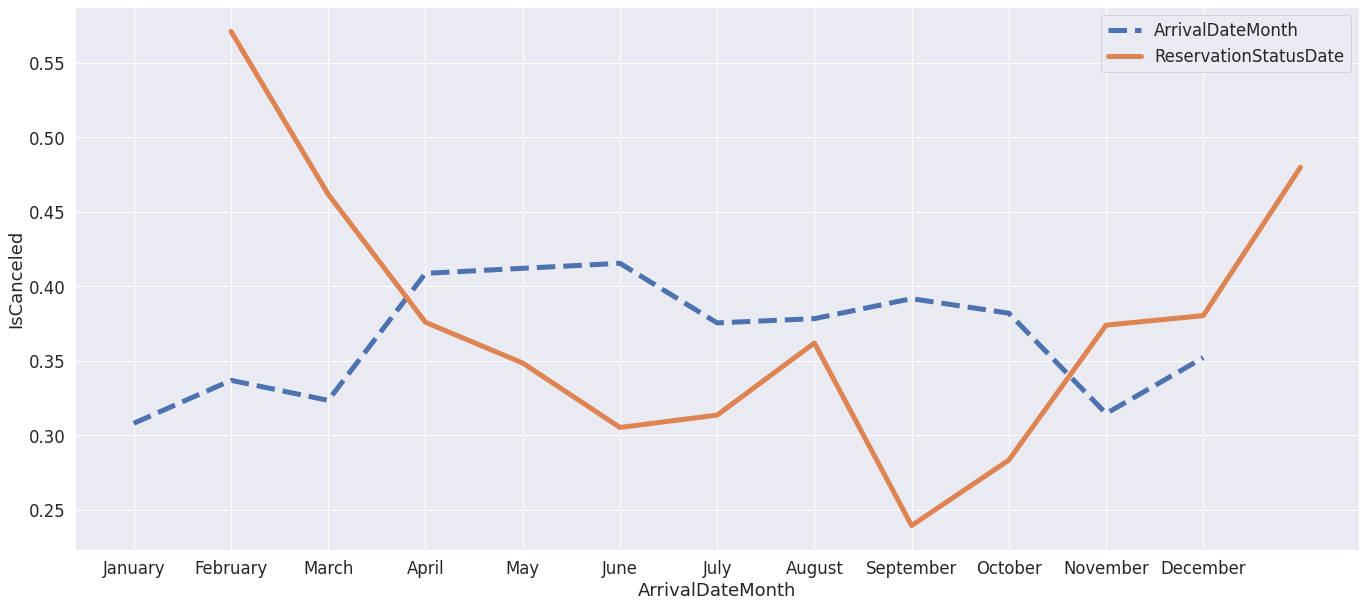

In [ ]:
# ArrivalDateMonth vs ReservationStatusDate - month
plt.figure(figsize=(23,10))
sns.set(font_scale=1.5)
data['ArrivalDateMonth'] = pd.Categorical(data['ArrivalDateMonth'], categories=['January','February','March','April','May','June','July','August','September','October','November','December'], ordered=True)
sns.lineplot(y="IsCanceled",x="ArrivalDateMonth", data=data, label="ArrivalDateMonth", linewidth = 5, linestyle="--", ci=None)

data["month"] = pd.DatetimeIndex(data["ReservationStatusDate"]).month
sns.lineplot(y=data["IsCanceled"],x=data["month"], label="ReservationStatusDate", linewidth = 5, ci=None)
plt.show()

In [ ]:
# plt.figure(figsize=(20,10))
# sns.lineplot(y=data["Avg Temperature (° F)"],x=frame['month'], label="Weather", linewidth = 5, ci=None)
# plt.show()

## **Data Preprocessing**

In [ ]:
data.head()

,Date,Avg Temperature (° F),HotelType,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate
0,2015-07-01,67.6,City,0,6,2015,7,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,0,0,0,A,A,0,1.0,0.0,0,Transient,0.0,0,0,2015-07-03
1,2015-07-01,67.6,City,1,88,2015,7,1,0,4,2,0.0,0,BB,PRT,Online TA,0,0,0,A,A,0,1.0,0.0,0,Transient,76.5,0,1,2015-07-01
2,2015-07-01,67.6,City,1,65,2015,7,1,0,4,1,0.0,0,BB,PRT,Online TA,0,0,0,A,A,0,1.0,0.0,0,Transient,68.0,0,1,2015-04-30
3,2015-07-01,67.6,City,1,92,2015,7,1,2,4,2,0.0,0,BB,PRT,Online TA,0,0,0,A,A,0,1.0,0.0,0,Transient,76.5,0,2,2015-06-23
4,2015-07-01,67.6,City,1,257,2015,7,1,0,2,2,0.0,0,HB,PRT,Offline TA/TO,0,1,0,A,A,0,1.0,0.0,0,Transient,101.5,0,0,2015-06-16


In [ ]:
data.dtypes

Date                           datetime64[ns]
Avg Temperature (° F)                 float64
HotelType                              object
IsCanceled                           category
LeadTime                                int64
ArrivalDateYear                         int64
ArrivalDateMonth                        int64
ArrivalDateDayOfMonth                   int64
StaysInWeekendNights                    int64
StaysInWeekNights                       int64
Adults                                  int64
Children                              float64
Babies                                  int64
Meal                                   object
Country                                object
MarketSegment                          object
IsRepeatedGuest                         int64
PreviousCancellations                   int64
PreviousBookingsNotCanceled             int64
ReservedRoomType                       object
AssignedRoomType                       object
BookingChanges                    

In [ ]:
data["ArrivalDateMonth"]=data["ArrivalDateMonth"].map({"January":1,"February":2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [ ]:
data["Date"] = pd.to_datetime( data["Date"])
data["ReservationStatusDate"] = pd.to_datetime( data["ReservationStatusDate"])

# **Building a baseline model**
1. Decision Tree
2. Random Forest Classifier
3. Logistic Regression
4. Light GBM


# **1. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
predictors = ['Avg Temperature (° F)', 'HotelType', 'LeadTime',
       'ArrivalDateMonth', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'MarketSegment', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'ReservedRoomType', 'BookingChanges', 'Agent',
       'Company', 'DaysInWaitingList', 'CustomerType', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']

target = 'IsCanceled'

X = pd.get_dummies(data[predictors], drop_first = True)
y = data[target]

data['IsCanceled'] = data['IsCanceled'].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 20)]
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	#print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

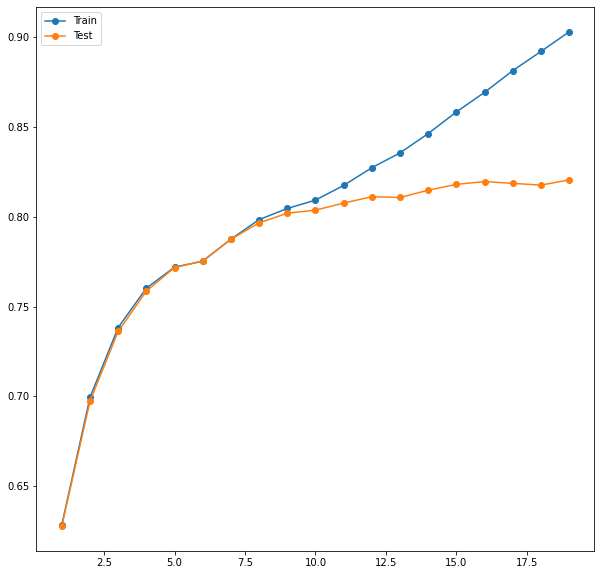

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

Based on the performance graph, choose to set the max_depth at 11.

In [ ]:
dt = DecisionTreeClassifier(max_depth = 11)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11)

In [ ]:
# from sklearn import tree
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(50,50))
# tree.plot_tree(dt, feature_names = X.columns, class_names = ['0','1'], filled = True) 
# plt.show()

In [ ]:
#pip install dmba

In [ ]:
# from dmba import plotDecisionTree, gainsChart, liftChart
# from dmba import classificationSummary, regressionSummary
# plotDecisionTree(dt, feature_names=X.columns, class_names=dt.classes_)

In [ ]:
import graphviz
from graphviz import Source
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz

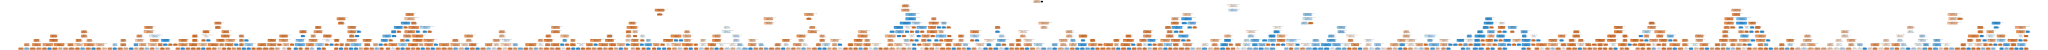

In [ ]:
dot_data = export_graphviz(dt, out_file=None, feature_names=X.columns, filled=True, rounded=True,  
                         special_characters=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"200,200!"')
pydot_graph.write_png('resized_tree.png')

gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

### The importances variables of decision tree

In [ ]:
importances = dt.feature_importances_
varimp = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
varimp = varimp.sort_values('importance', ascending = False)
print(varimp)

                              feature  importance
1                            LeadTime    0.218211
15             TotalOfSpecialRequests    0.181954
9               PreviousCancellations    0.132770
49             CustomerType_Transient    0.093090
35               MarketSegment_Groups    0.074164
14           RequiredCarParkingSpaces    0.051261
13                                ADR    0.044861
37            MarketSegment_Online TA    0.043533
11                     BookingChanges    0.027442
34               MarketSegment_Direct    0.016832
50       CustomerType_Transient-Party    0.015500
0               Avg Temperature (° F)    0.013319
10        PreviousBookingsNotCanceled    0.010904
12                  DaysInWaitingList    0.010682
3                StaysInWeekendNights    0.009801
2               ArrivalDateDayOfMonth    0.009297
4                   StaysInWeekNights    0.006750
16                   HotelType_Resort    0.006731
5                              Adults    0.006026


In [ ]:
# (pd.Series(dt.feature_importances_, index=X_train.columns).nlargest(10).plot(kind='barh')) 

# plt.title("Top 10 Attributes' Importance")

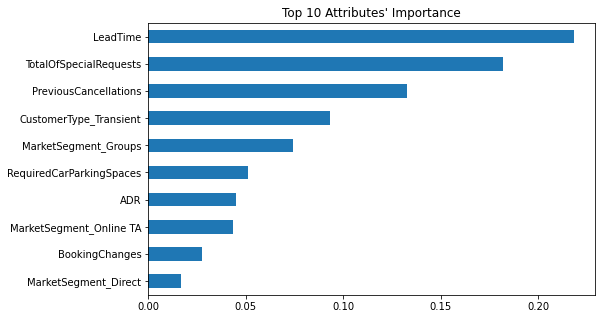

In [ ]:
plt.figure(figsize=(8,5))
s = pd.Series(dt.feature_importances_, index=X_train.columns).nlargest(10)
ax = s.iloc[:10].plot(kind="barh")
ax.invert_yaxis()
plt.title("Top 10 Attributes' Importance")
plt.show()

In [ ]:
# plt.figure(figsize=(13,13))
# sorted_idx = dt.feature_importances_.argsort()
# plt.barh(X_train.columns[sorted_idx], dt.feature_importances_[sorted_idx])
# plt.xlabel("Top 10 Attributes' Importance")

### Evaluation 

In [ ]:

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
print("Training dataset")
print("Accuracy:",accuracy_score(y_train, dt.predict(X_train)))
print("precision score: ", precision_score(y_train,dt.predict(X_train)))
print("recall score: ", recall_score(y_train,dt.predict(X_train)))
print("f1-score: ", f1_score(y_train,dt.predict(X_train)))

Training dataset
Accuracy: 0.8174223336668636
precision score:  0.808575140753573
recall score:  0.6663530175210902
f1-score:  0.7306070901296715


In [ ]:
a1 = accuracy_score(y_test, dt.predict(X_test))
p1 = precision_score(y_test,dt.predict(X_test))
r1 = recall_score(y_test,dt.predict(X_test))
f1 = f1_score(y_test,dt.predict(X_test))

print("Testing dataset")
print("Accuracy:",a1)
print("precision score: ", p1)
print("recall score: ", r1)
print("f1-score: ", f1)

Testing dataset
Accuracy: 0.807572220190712
precision score:  0.7931034482758621
recall score:  0.6535177208493916
f1-score:  0.7165762107967022


**After SMOTE**

We can't see improvement on accuracy 

In [ ]:
 pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
sm = SMOTE()
# trainx_sm, trainy_sm = sm.fit_resample(X_train, y_train.ravel())
# # trainx_sm, trainy_sm = sm.fit_sample(trainx.astype("float"),trainy.ravel())
# # print("Before oversampling, counts of label '1': {}".format(sum(y_train==1)))
# # print("Before oversampling, counts of label '0': {} \n".format(sum(y_train ==0)))

# # print('After Oversampling, counts of label "1": {}'.format(sum(trainy_sm==1)))
# # print('After Oversampling, counts of label "0": {}'.format(sum(trainx_sm==0)))

In [ ]:
# print('Accuracy on training:', accuracy_score(trainy_sm, dt.predict(trainx_sm)))
# print('Accuracy on test:', accuracy_score(y_test, dt.predict(X_test)))

Accuracy on training: 0.7872954671884291
Accuracy on test: 0.8075440915867346


In [ ]:
# #performance on validation
# print("validation set")
# print('Accuracy:', accuracy_score(y_test, dt.predict(X_test)))
# print('Precision:', precision_score(y_test, dt.predict(X_test)))
# print('Recall:', recall_score(y_test, dt.predict(X_test)))
# print('f1_score:', f1_score(y_test, dt.predict(X_test)))

**confusion matrix**

In [ ]:
 from sklearn.metrics import confusion_matrix
 matrix_test = confusion_matrix(y_test, dt.predict(X_test), labels=[1,0])
 print("matrix_test:\n", matrix_test)

 matrix_train = confusion_matrix(y_train, dt.predict(X_train), labels=[1,0])
 print("matrix_train:\n", matrix_train)

matrix_test:
 [[ 8648  4585]
 [ 2256 20062]]
matrix_train:
 [[20537 10283]
 [ 4862 47269]]


In [ ]:
import seaborn as sns

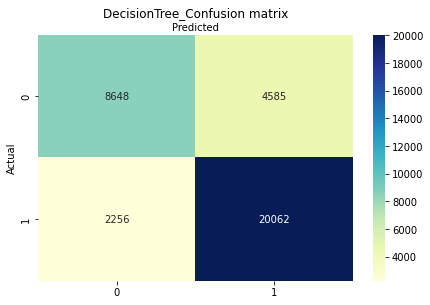

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix_test), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('DecisionTree_Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**ROC curve for Decision Tree**

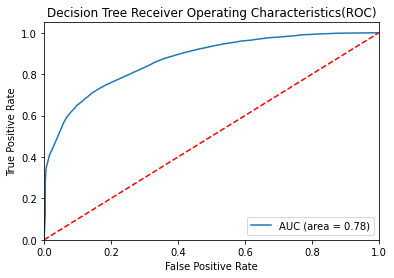

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
dt_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Receiver Operating Characteristics(ROC)')
plt.legend(loc="lower right")
plt.savefig('Decision Tree_ROC')
plt.show()


In [ ]:
 pip install scikit-plot

**Lift Curve for decision tree**

<Figure size 1800x1800 with 0 Axes>

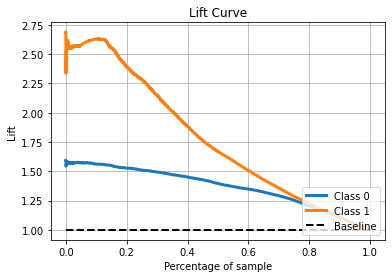

In [ ]:
# import scikitplot as skplt
# plt.figure(figsize=(25,25))
# skplt.metrics.plot_lift_curve(y_test, dt.predict_proba(X_test))
# plt.show()

resource: https://towardsdatascience.com/evaluate-model-performance-with-cumulative-gains-and-lift-curves-1f3f8f79da01

In [ ]:
pip install kds

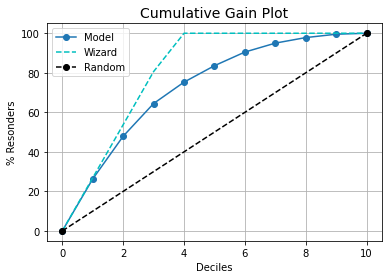

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree

predictors = ['Avg Temperature (° F)', 'HotelType', 'LeadTime',
       'ArrivalDateMonth', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'MarketSegment', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'ReservedRoomType', 'BookingChanges', 'Agent',
       'Company', 'DaysInWaitingList', 'CustomerType', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']

target = 'IsCanceled'

X = pd.get_dummies(data[predictors], drop_first = True)
y = data[target]

data['IsCanceled'] = data['IsCanceled'].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

dt = tree.DecisionTreeClassifier(max_depth=11,random_state=1)
dt = dt.fit(X_train, y_train)
y_prob = dt.predict_proba(X_test)


# CUMMULATIVE GAIN PLOT
import kds
kds.metrics.plot_cumulative_gain(y_test, y_prob[:,1])

None

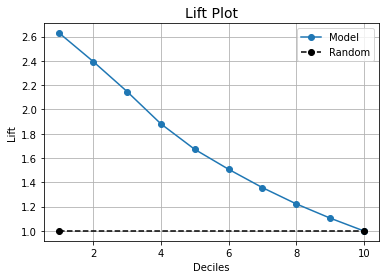

In [ ]:
# LIFT PLOT without class0
display(kds.metrics.plot_lift(y_test, y_prob[:,1]))

# **2. Random Forest**

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# data_model2 = data.drop(columns = ["Date", "ReservationStatusDate"])
# df_model2 = pd.get_dummies(data,prefix_sep='_',drop_first=True)


In [ ]:
# def get_predictions(clf, X_train, y_train, X_test):
#     # create classifier
#     clf = clf
#     # fit it to training data
#     clf.fit(X_train,y_train)
#     # predict using test data
#     y_pred = clf.predict(X_test)
#     # Compute predicted probabilities: y_pred_prob
#     y_pred_prob = clf.predict_proba(X_test)
#     #for fun: train-set predictions
#     train_pred = clf.predict(X_train)
#     print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
#     return y_pred, y_pred_prob

In [ ]:
# def print_scores(y_test,y_pred,y_pred_prob):
#     print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
#     print("recall score: ", recall_score(y_test,y_pred))
#     print("precision score: ", precision_score(y_test,y_pred))
#     print("f1 score: ", f1_score(y_test,y_pred))
#     print("accuracy score: ", accuracy_score(y_test,y_pred))
#     print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# data_model2['IsCanceled'] = data_model2['IsCanceled'].astype('category')
# excludeColumnsRF = ('IsCanceled')
# predictorsRF = [s for s in df_model2.columns if s not in excludeColumnsRF]
# outcomeRF = 'IsCanceled'

# xRF = df_model2[predictorsRF]
# yRF = df_model2[outcomeRF]

# train_xRF, valid_xRF, train_yRF, valid_yRF = train_test_split(xRF, yRF, test_size=0.3, random_state=1234)

# clf = RandomForestClassifier(max_depth=5, random_state=1234)
# clf.fit(xRF, yRF)

# (pd.Series(clf.feature_importances_, index=xRF.columns).nlargest(10).plot(kind='barh')) 

# plt.title("Top 10 Attributes' Importance")

In [ ]:
predictors = ['Avg Temperature (° F)', 'HotelType', 'LeadTime',
       'ArrivalDateMonth', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'MarketSegment', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'ReservedRoomType', 'BookingChanges', 'Agent',
       'Company', 'DaysInWaitingList', 'CustomerType', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']

target = 'IsCanceled'

X = pd.get_dummies(data[predictors], drop_first = True)
y = data[target]

data['IsCanceled'] = data['IsCanceled'].astype('category')

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
rf=RandomForestClassifier(random_state = 42, n_estimators=100) # n_estimator is normally 10 - 100 based on my research
rf.fit(X_train_rf,y_train_rf)

RandomForestClassifier(random_state=42)

In [ ]:
# Model evaluation on training set
print("Accuracy with training set:",accuracy_score(y_train_rf, rf.predict(X_train_rf)))
# Model evaluation on testing set
print("Accuracy with testing set:",accuracy_score(y_test_rf, rf.predict(X_test_rf)))

Accuracy with training set: 0.9911272920157683
Accuracy with testing set: 0.8634637562937751


In [ ]:

p2= precision_score(y_test_rf,rf.predict(X_test_rf))
r2= recall_score(y_test_rf,rf.predict(X_test_rf))
f2=f1_score(y_test_rf,rf.predict(X_test_rf))
a2=accuracy_score(y_test_rf, rf.predict(X_test_rf))

print("precision score: ", p2)
print("recall score: ", r2)
print("f1-score: ", f2)
print("Accuracy:",a2)

precision score:  0.8630101377696907
recall score:  0.75266379505781
f1-score:  0.8040687817873577
Accuracy: 0.8634637562937751


In [ ]:
from sklearn.metrics import confusion_matrix
matrix_test = confusion_matrix(y_test_rf, rf.predict(X_test_rf), labels=[1,0])
print("matrix_test:\n", matrix_test)

matrix_train = confusion_matrix(y_train_rf, rf.predict(X_train_rf), labels=[1,0])
print("matrix_train:\n", matrix_train)

matrix_test:
 [[ 9960  3273]
 [ 1581 20737]]
matrix_train:
 [[30341   479]
 [  257 51874]]


**Confusion Matrix** before smote

In [ ]:
# class_names=[0,1] # name  of classes
# fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)
# # create heatmap
# sns.heatmap(pd.DataFrame(matrix_test), annot=True, cmap="YlGnBu" ,fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title('RF_Confusion matrix', y=1.1)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')

**After SMOTE**
- Overfitting prolbem is a bit solved

In [ ]:
sm = SMOTE()
trainx_sm, trainy_sm = sm.fit_resample(X_train_rf, y_train_rf.ravel())#only run this one please
#trainx_sm, trainy_sm = sm.fit_resample(X_train.astype("float"),y_train.ravel())
#  print("Before oversampling, counts of label '1': {}".format(sum(y_train==1)))
#  print("Before oversampling, counts of label '0': {} \n".format(sum(y_train ==0)))

#  print('After Oversampling, counts of label "1": {}'.format(sum(trainy_sm==1)))
#  print('After Oversampling, counts of label "0": {}'.format(sum(trainx_sm==0)))

In [ ]:
print('Accuracy on training:', accuracy_score(trainy_sm, rf.predict(trainx_sm)))
print('Accuracy on test:', accuracy_score(y_test_rf, rf.predict(X_test_rf)))

Accuracy on training: 0.9440735838560549
Accuracy on test: 0.8634637562937751


In [ ]:
# #performance on validation
# print("validation set")
# print('Accuracy:', accuracy_score(y_test, rf.predict(X_test)))
# print('Precision:', precision_score(y_test, rf.predict(X_test)))
# print('Recall:', recall_score(y_test, rf.predict(X_test)))
# print('f1_score:', f1_score(y_test, rf.predict(X_test)))

In [ ]:
# yRF_pred, yRF_pred_prob = get_predictions(RandomForestClassifier(max_depth = 5, random_state=1), train_xRF, train_yRF, valid_xRF)
# print_scores(valid_yRF,yRF_pred,yRF_pred_prob)

**Confusion Matrix after SMOTE**

In [ ]:
from sklearn.metrics import confusion_matrix
matrix_test = confusion_matrix(y_test_rf, rf.predict(X_test_rf), labels=[1,0])
print("matrix_test:\n", matrix_test)

matrix_train = confusion_matrix(y_train_rf, rf.predict(X_train_rf), labels=[1,0])
print("matrix_train:\n", matrix_train)

matrix_test:
 [[ 9960  3273]
 [ 1581 20737]]
matrix_train:
 [[30341   479]
 [  257 51874]]


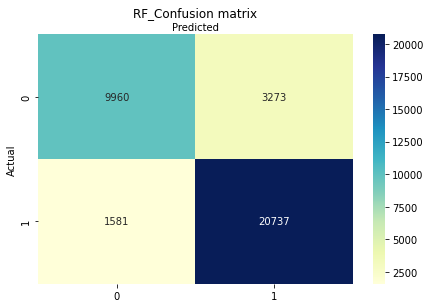

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix_test), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('RF_Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Important variable 

In [ ]:
importances = rf.feature_importances_
varimp = pd.DataFrame({'feature': X_train_rf.columns, 'importance': importances})
varimp = varimp.sort_values('importance', ascending = False).head(20)
print(varimp)

                              feature  importance
1                            LeadTime    0.178101
13                                ADR    0.113319
0               Avg Temperature (° F)    0.084729
15             TotalOfSpecialRequests    0.073325
2               ArrivalDateDayOfMonth    0.072444
9               PreviousCancellations    0.050057
4                   StaysInWeekNights    0.047310
35               MarketSegment_Groups    0.034845
3                StaysInWeekendNights    0.029903
49             CustomerType_Transient    0.029262
11                     BookingChanges    0.028105
14           RequiredCarParkingSpaces    0.024222
50       CustomerType_Transient-Party    0.023693
5                              Adults    0.017169
16                   HotelType_Resort    0.014905
37            MarketSegment_Online TA    0.013962
34               MarketSegment_Direct    0.013078
36        MarketSegment_Offline TA/TO    0.012427
40  ReservedRoomType_D                   0.010568


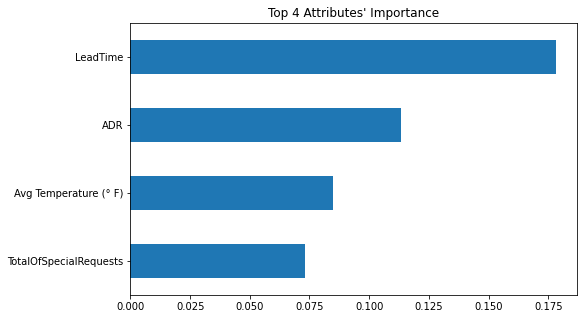

In [ ]:
plt.figure(figsize=(8,5))
s = pd.Series(rf.feature_importances_, index=X_train_rf.columns).nlargest(4)
ax = s.iloc[:4].plot(kind="barh")
ax.invert_yaxis()
plt.title("Top 4 Attributes' Importance")
plt.show()

In [ ]:
# plt.figure(figsize=(13,13))
# sorted_idx = rf.feature_importances_.argsort()
# plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
# plt.xlabel("Random Forest Feature Importance")

**ROC and AUC** 

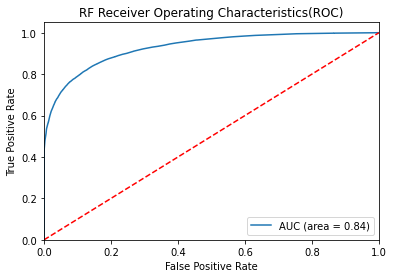

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
rf_roc_auc = roc_auc_score(y_test_rf, rf.predict(X_test_rf))
fpr, tpr, thresholds = roc_curve(y_test_rf, rf.predict_proba(X_test_rf)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF Receiver Operating Characteristics(ROC)')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

**Lift Curve** before smote

<Figure size 1440x1440 with 0 Axes>

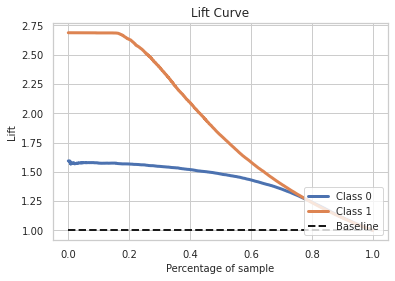

In [ ]:
# import scikitplot as skplt
# plt.figure(figsize=(20,20))
# skplt.metrics.plot_lift_curve(y_test, rf.predict_proba(X_test))
# plt.show()

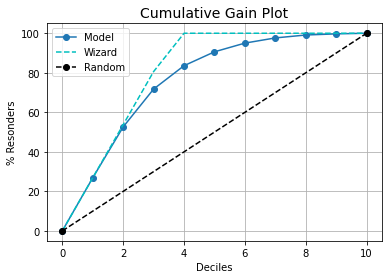

In [ ]:
# CUMMULATIVE GAIN PLOT
import kds
kds.metrics.plot_cumulative_gain(y_test_rf, rf.predict_proba(X_test_rf)[:,1])

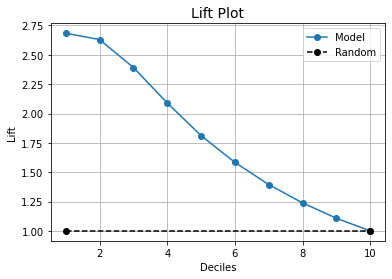

In [ ]:
# LIFT PLOT without class0
kds.metrics.plot_lift(y_test_rf, rf.predict_proba(X_test_rf)[:,1])

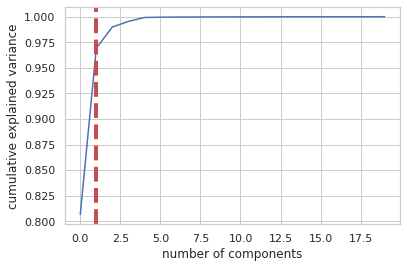

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.806732,0.806732
1,0.969184,0.162452
2,0.989878,0.020694
3,0.995313,0.005435
4,0.999201,0.003887
5,0.999466,0.000265
6,0.999619,0.000153
7,0.999671,0.000051
8,0.999719,0.000049
9,0.999765,0.000046


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=20)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=0.95, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

Overfitting -- PCA -- doesn't work -- ignore

In [ ]:
#pca = PCA(n_components=0.95)
#pca.fit(X_train)
#X_train_pca = pca.transform(X_train)
#X_test_pca = pca.transform(X_test)

#rfc = RandomForestClassifier()
#rfc.fit(X_train_pca, y_train)

In [ ]:
# Model evaluation on training set
#print("Accuracy with training set:",accuracy_score(y_train, rfc.predict(X_train_pca)))
# Model evaluation on validation set
#print("Accuracy with validation set:",accuracy_score(y_test, rfc.predict(X_test_pca)))

In [ ]:
#p4= precision_score(y_test,rfc.predict(X_test_pca))
#r4= recall_score(y_test,rfc.predict(X_test_pca))
#f1_4=f1_score(y_test,rfc.predict(X_test_pca))
#a4=accuracy_score(y_test, rfc.predict(X_test_pca))
#print("precision score: ", p4)
#print("recall score: ", r4)
#print("f1-score: ", f1_4)
#print("Accuracy:",a4)

# **3. Logistic Regression**

In [ ]:
predictors1 = ['Avg Temperature (° F)', 'LeadTime',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies',  'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
      'BookingChanges', 'Agent',
      'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']

target = 'IsCanceled'

X = data[predictors1]
y = data[target]


In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train_lr,X_test_lr,y_train_lr,y_testlr=train_test_split(X,y,test_size=0.3,random_state=1)
# 70% data will be used for model training and 30% for model testing


In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
# instantiate the model (using the default parameters)

# fit the model with data
logreg.fit(X_train_lr,y_train_lr)

#
y_pred=logreg.predict(X_test_lr)

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_testlr, y_pred)
cnf_matrix

array([[19661,  2657],
       [ 6657,  6576]])

#### ROC curve for Logistic Regression

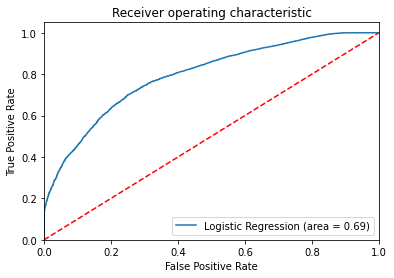

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_testlr, logreg.predict(X_test_lr))
fpr2, tpr2, thresholds = roc_curve(y_testlr, logreg.predict_proba(X_test_lr)[:,1])
plt.figure()
plt.plot(fpr2, tpr2, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Lift curve for Logistic Regression

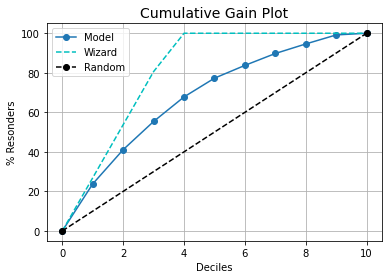

In [ ]:
# CUMMULATIVE GAIN PLOT
import kds
kds.metrics.plot_cumulative_gain(y_testlr, logreg.predict_proba(X_test_lr)[:,1])

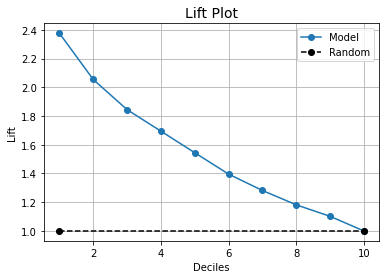

In [ ]:
# LIFT PLOT without class0
kds.metrics.plot_lift(y_testlr, logreg.predict_proba(X_test_lr)[:,1])

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted')

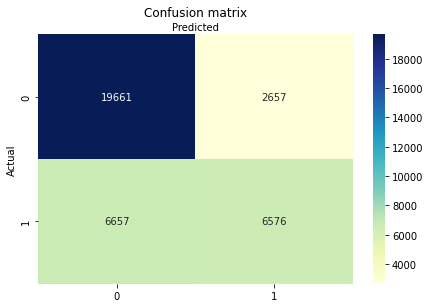

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
a3 = metrics.accuracy_score(y_testlr, y_pred)
f3 = metrics.f1_score(y_testlr, y_pred)
p3 = metrics.precision_score(y_testlr, y_pred)
r3 = metrics.recall_score(y_testlr, y_pred)

print("Accuracy:",metrics.accuracy_score(y_testlr, y_pred))
print("F1:", metrics.f1_score(y_testlr, y_pred))
print("Precision:",metrics.precision_score(y_testlr, y_pred))
print("Recall:",metrics.recall_score(y_testlr, y_pred))

Accuracy: 0.7380101825546398
F1: 0.5854179649247753
Precision: 0.7122278782627531
Recall: 0.49693946950804807


## **4. Light GBM**

In [ ]:
pip install dmba

     |████████████████████████████████| 11.8 MB 12.1 MB/s 


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from dmba import plotDecisionTree, classificationSummary, regressionSummary

no display found. Using non-interactive Agg backend


In [ ]:
#num_data = data.select_dtypes(include=['float64', "int64"])
# x = num_data
# y = data["IsCanceled"]

Change float columns into category

In [ ]:
# data["HotelType"] = data["HotelType"].astype("category")
# data["ArrivalDateMonth"] = data["ArrivalDateMonth"].astype("category")
# data["Meal"] = data["Meal"].astype("category")
# data["Country"] = data["Country"].astype("category")
# data["MarketSegment"] = data["MarketSegment"].astype("category")
# data["CustomerType"] = data["CustomerType"].astype("category")

In [ ]:
data.dtypes


Date                             object
Avg Temperature (° F)           float64
HotelType                        object
IsCanceled                     category
LeadTime                          int64
ArrivalDateYear                   int64
ArrivalDateMonth                 object
ArrivalDateDayOfMonth             int64
StaysInWeekendNights              int64
StaysInWeekNights                 int64
Adults                            int64
Children                        float64
Babies                            int64
Meal                             object
Country                          object
MarketSegment                    object
IsRepeatedGuest                   int64
PreviousCancellations             int64
PreviousBookingsNotCanceled       int64
ReservedRoomType                 object
AssignedRoomType                 object
BookingChanges                    int64
Agent                          category
Company                        category
DaysInWaitingList                 int64


In [ ]:
x = ['Avg Temperature (° F)', 'HotelType', 'LeadTime',
       'ArrivalDateMonth', 'ArrivalDateDayOfMonth',
      'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'ReservedRoomType', 'BookingChanges', 'Agent',
       'Company', 'DaysInWaitingList', 'CustomerType', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']
y = data["IsCanceled"]

x = pd.get_dummies(data[predictors], drop_first = True)

In [ ]:
x.head()

,Avg Temperature (° F),LeadTime,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,HotelType_Resort,ArrivalDateMonth_August,ArrivalDateMonth_December,ArrivalDateMonth_February,ArrivalDateMonth_January,ArrivalDateMonth_July,ArrivalDateMonth_June,ArrivalDateMonth_March,ArrivalDateMonth_May,ArrivalDateMonth_November,ArrivalDateMonth_October,ArrivalDateMonth_September,Meal_FB,Meal_HB,Meal_SC,Meal_Undefined,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,ReservedRoomType_B,ReservedRoomType_C,ReservedRoomType_D,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G,ReservedRoomType_H,ReservedRoomType_L,Agent_1.0,Company_1.0,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
0,67.6,6,1,0,2,1,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,67.6,88,1,0,4,2,0.0,0,0,0,0,0,0,76.5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,67.6,65,1,0,4,1,0.0,0,0,0,0,0,0,68.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,67.6,92,1,2,4,2,0.0,0,0,0,0,0,0,76.5,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,67.6,257,1,0,2,2,0.0,0,0,1,0,0,0,101.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
# train and test split
x_train_lg, x_test_lg, y_train_lg, y_test_lg = train_test_split(x, y, test_size = 0.30, random_state=1)

In [ ]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth= -5,random_state=42)
model.fit(x_train_lg,y_train_lg,eval_set=[(x_test_lg,y_test_lg),(x_train_lg,y_train_lg)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.432884	training's binary_logloss: 0.432884	valid_0's binary_logloss: 0.432677	valid_0's binary_logloss: 0.432677
[40]	training's binary_logloss: 0.397046	training's binary_logloss: 0.397046	valid_0's binary_logloss: 0.398616	valid_0's binary_logloss: 0.398616
[60]	training's binary_logloss: 0.38329	training's binary_logloss: 0.38329	valid_0's binary_logloss: 0.387305	valid_0's binary_logloss: 0.387305
[80]	training's binary_logloss: 0.37411	training's binary_logloss: 0.37411	valid_0's binary_logloss: 0.381007	valid_0's binary_logloss: 0.381007
[100]	training's binary_logloss: 0.367238	training's binary_logloss: 0.367238	valid_0's binary_logloss: 0.376914	valid_0's binary_logloss: 0.376914


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
print('Training accuracy {:.4f}'.format(model.score(x_train_lg,y_train_lg)))
print('Testing accuracy {:.4f}'.format(model.score(x_test_lg,y_test_lg)))

Training accuracy 0.8318
Testing accuracy 0.8276


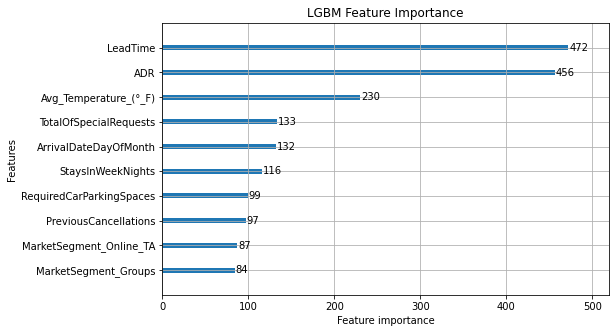

In [ ]:
lgb.plot_importance(model, figsize=(8,5), max_num_features=10)
plt.title("LGBM Feature Importance")
plt.show()

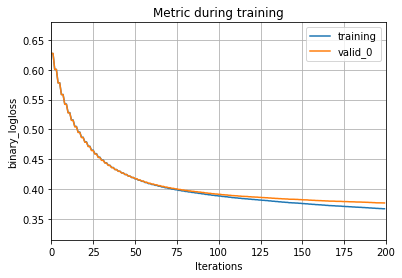

In [ ]:
lgb.plot_metric(model)

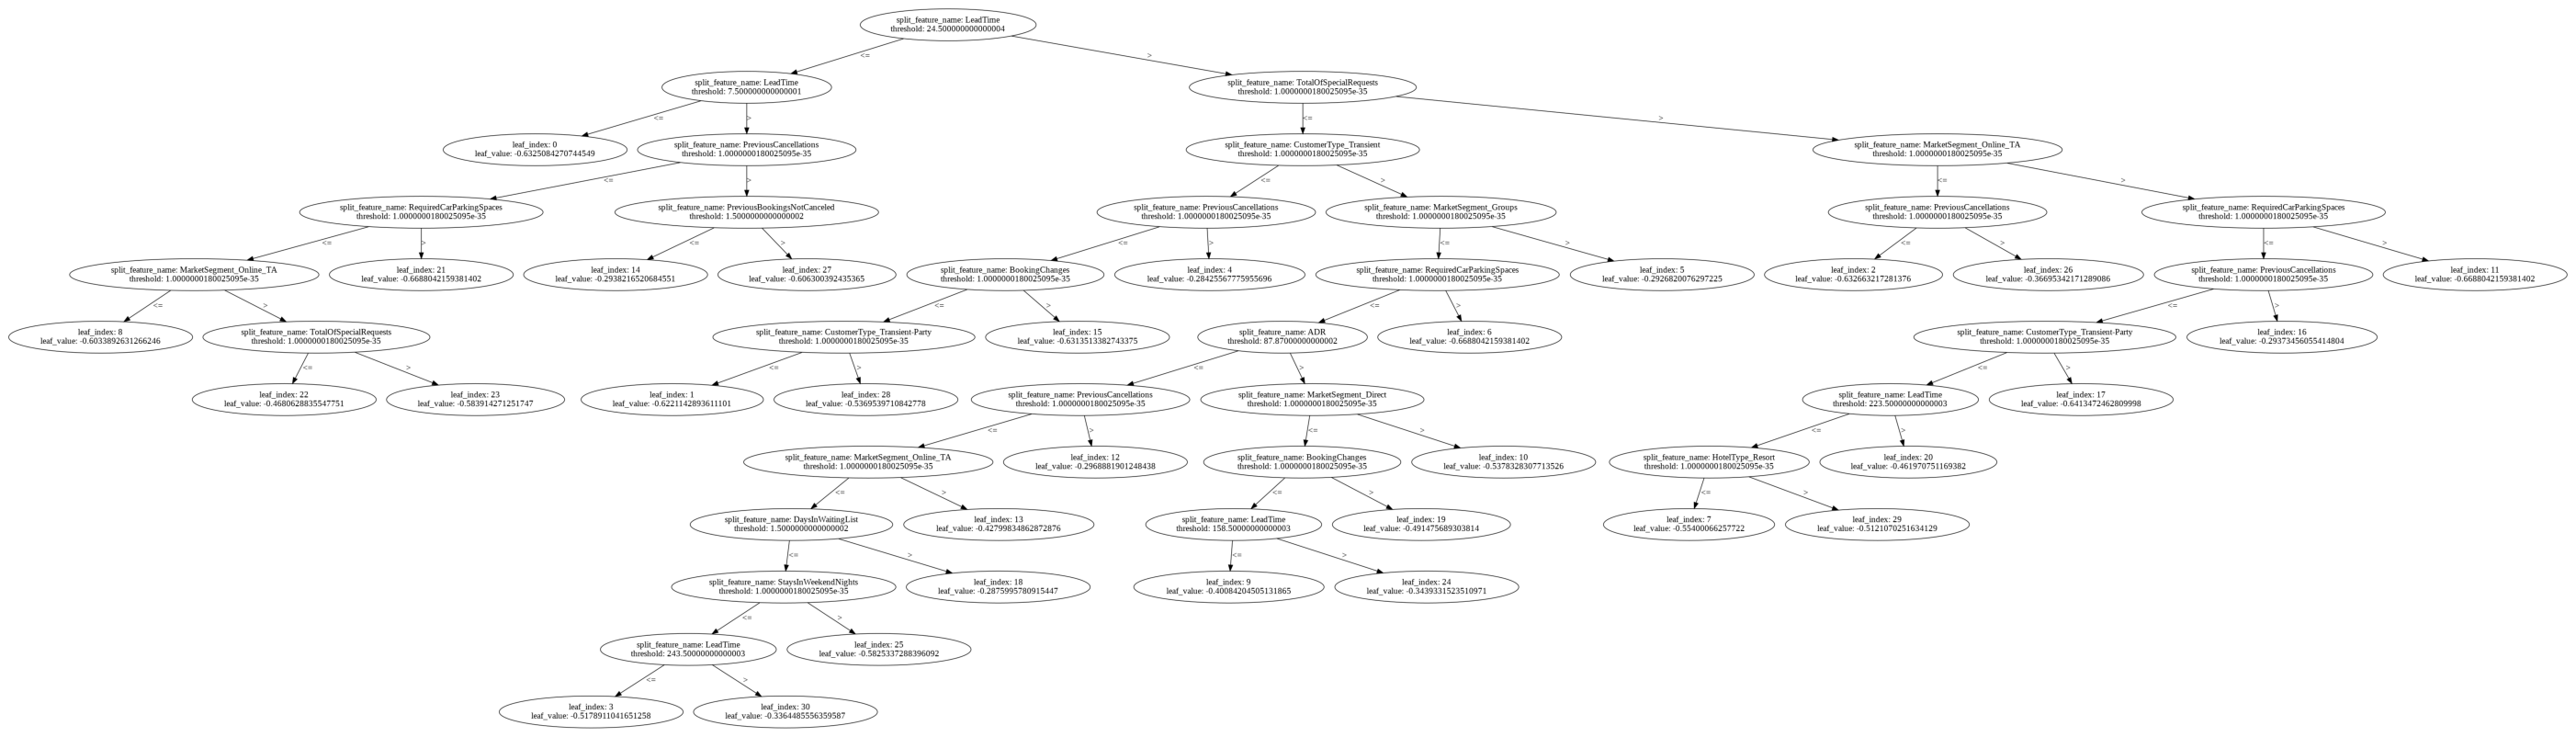

In [ ]:
lgb.plot_tree(model,figsize=(50,40))

In [ ]:
LGBM_matrix = metrics.confusion_matrix(y_test_lg, model.predict(x_test_lg))
LGBM_matrix

array([[20642,  1676],
       [ 4452,  8781]])

In [ ]:
print(classificationSummary(y_test_lg, model.predict(x_test_lg)))

Confusion Matrix (Accuracy 0.8276)

       Prediction
Actual     0     1
     0 20642  1676
     1  4452  8781
None


Text(0.5, 257.44, 'Predicted')

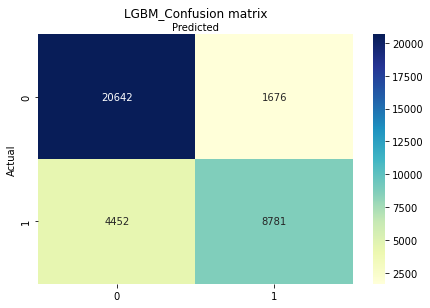

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(LGBM_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('LGBM_Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

**False Negative**: 4857 (the company predicted customers will not cancel the reservation so we assume that they invest money in marketing or advertising but the reservation is actually cancelled)<br>
In our busienss case, it's important to reduce a FN rate to protect loss of money

In [ ]:
print(metrics.classification_report(y_test_lg,model.predict(x_test_lg)))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87     22318
           1       0.84      0.66      0.74     13233

    accuracy                           0.83     35551
   macro avg       0.83      0.79      0.81     35551
weighted avg       0.83      0.83      0.82     35551



In [ ]:
a4 = 0.83
P4 = 0.80
r4 = 0.80
f4 = 0.80


reference: https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/

#### ROC curve for Light GBM

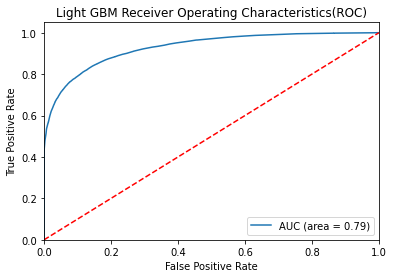

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lgb_roc_auc = roc_auc_score(y_test_lg, model.predict(x_test_lg))
fpr3, tpr3, thresholds = roc_curve(y_test_lg, model.predict_proba(x_test_lg)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % lgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Light GBM Receiver Operating Characteristics(ROC)')
plt.legend(loc="lower right")
plt.savefig('LGB_ROC')
plt.show()

Lift Curve for Light GBM

<Figure size 504x504 with 0 Axes>

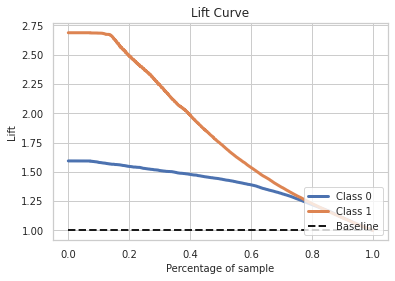

In [ ]:
# plt.figure(figsize=(7,7))
# skplt.metrics.plot_lift_curve(y_test_lg, model.predict_proba(x_test_lg))
# plt.show()

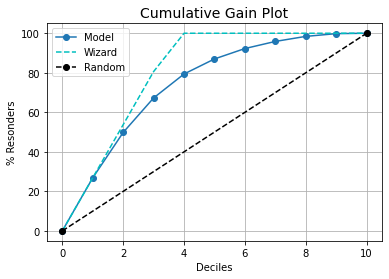

In [ ]:
# CUMMULATIVE GAIN PLOT
import kds
kds.metrics.plot_cumulative_gain(y_test_lg, model.predict_proba(x_test_lg)[:,1])

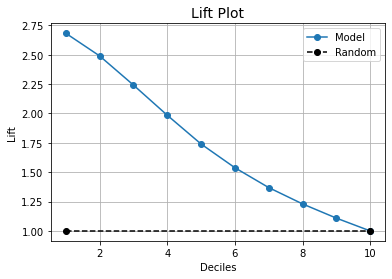

In [ ]:
# LIFT PLOT without class0
kds.metrics.plot_lift(y_test_lg, model.predict_proba(x_test_lg)[:,1])

# **Comparison of Accuracy, Precision, Recall, and F1-Score for all the models that we built**

In [ ]:
# Creating lists of all scores for comparison
p=[p1,p2,p3,p5]
r=[r1,r2,r3,r5]
f=[f1,f2,f3,f5]
acc=[a1,a2,a3,a5]
#area=[area1,area2,area3]

# Dataframe for comparison
df_metrics=pd.DataFrame({"Classifier":["Decision Tree Classifier","Random Forest","Logistic Regression","Light GBM"],"Accuracy":acc,"Precision":p,"Recall":r,"F score":f})
df_metrics

,Classifier,Accuracy,Precision,Recall,F score
0,Decision Tree Classifier,0.807460,0.792866,0.653442,0.716434
1,Random Forest,0.863464,0.863010,0.752664,0.804069
2,Logistic Regression,0.738010,0.712228,0.496939,0.585418
3,Light GBM,0.829900,0.800800,0.722800,0.759800


In [ ]:
# ROC in one graph

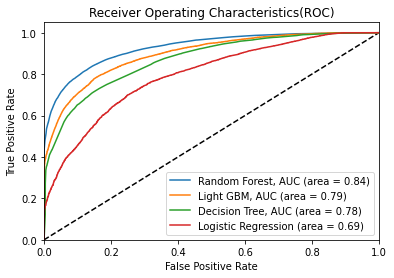

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
logit_roc_auc = roc_auc_score(y_testlr, logreg.predict(X_test_lr))
fpr2, tpr2, thresholds = roc_curve(y_testlr, logreg.predict_proba(X_test_lr)[:,1])
lgb_roc_auc = roc_auc_score(y_test_lg, model.predict(x_test_lg))
fpr3, tpr3, thresholds = roc_curve(y_test_lg, model.predict_proba(x_test_lg)[:,1])
rf_roc_auc = roc_auc_score(y_test_rf, rf.predict(X_test_rf))
fpr4, tpr4, thresholds = roc_curve(y_test_rf, rf.predict_proba(X_test_rf)[:,1])
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr4, tpr4, label='Random Forest, AUC (area = %0.2f)' % rf_roc_auc)
plt.plot(fpr3, tpr3, label= "Light GBM, AUC (area = %0.2f)"% lgb_roc_auc)
plt.plot(fpr, tpr, label= "Decision Tree, AUC (area = %0.2f)"% dt_roc_auc)
plt.plot(fpr2, tpr2, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics(ROC)')
plt.legend(loc="lower right")
plt.savefig('LGB_ROC')
plt.show()

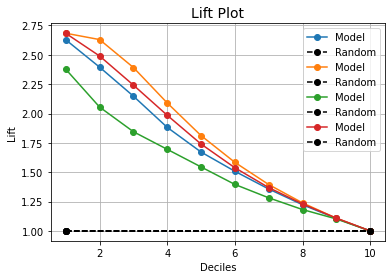

In [ ]:
# Lift in one graph

# LIFT PLOT without class0
kds.metrics.plot_lift(y_test, y_prob[:,1]) # DT
# LIFT PLOT without class0
kds.metrics.plot_lift(y_test_rf, rf.predict_proba(X_test_rf)[:,1]) # RF
# LIFT PLOT without class0
kds.metrics.plot_lift(y_testlr, logreg.predict_proba(X_test_lr)[:,1]) # LR

kds.metrics.plot_lift(y_test_lg, model.predict_proba(x_test_lg)[:,1]) # LGBM


In [ ]:
# BLUE = DT
# ORANGE = RF
# Green = LR
# RED = LGBM

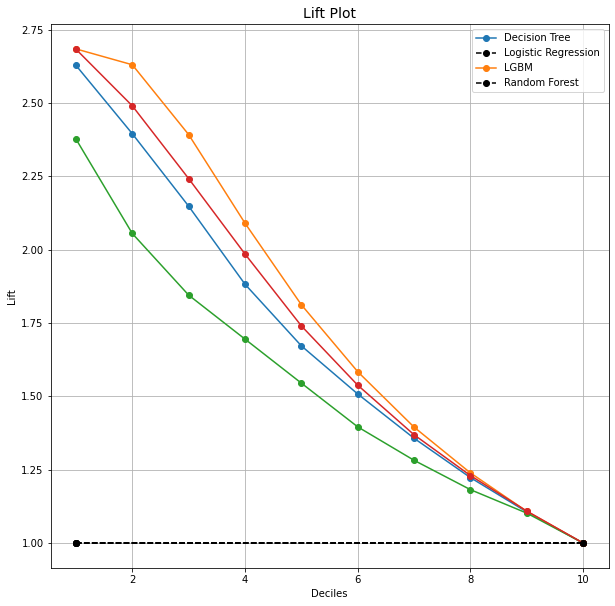

In [ ]:
# Lift in one graph
plt.figure(figsize=(10,10))
# LIFT PLOT without class0
kds.metrics.plot_lift(y_test, y_prob[:,1])
# LIFT PLOT without class0
kds.metrics.plot_lift(y_test_rf, rf.predict_proba(X_test_rf)[:,1])
# LIFT PLOT without class0
kds.metrics.plot_lift(y_testlr, logreg.predict_proba(X_test_lr)[:,1])

kds.metrics.plot_lift(y_test_lg, model.predict_proba(x_test_lg)[:,1])

plt.legend({'Decision Tree', 'Random Forest', 'Logistic Regression','LGBM'})
plt.show()

#### Random Forest is the best model in our case. It has the highest accuracy and recall which is important for our business case 

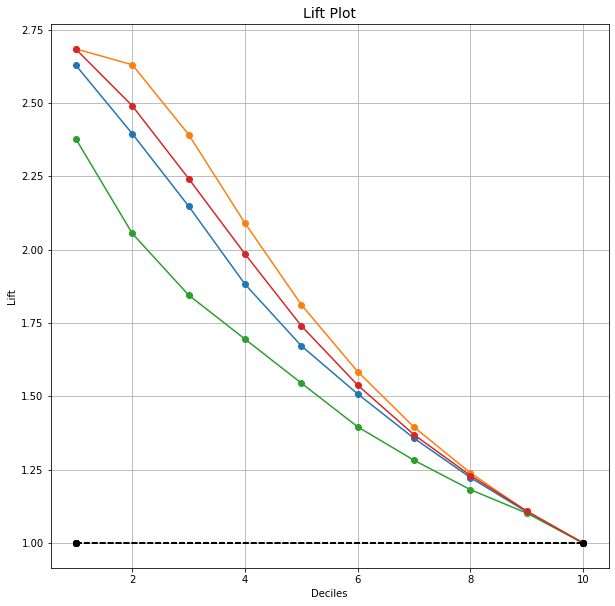

In [ ]:
# Lift in one graph
plt.figure(figsize=(10,10))
# LIFT PLOT without class0
kds.metrics.plot_lift(y_test, y_prob[:,1])
# LIFT PLOT without class0
kds.metrics.plot_lift(y_test_rf, rf.predict_proba(X_test_rf)[:,1])
# LIFT PLOT without class0
kds.metrics.plot_lift(y_testlr, logreg.predict_proba(X_test_lr)[:,1])

kds.metrics.plot_lift(y_test_lg, model.predict_proba(x_test_lg)[:,1])

plt.legend('',frameon=False)
plt.show()

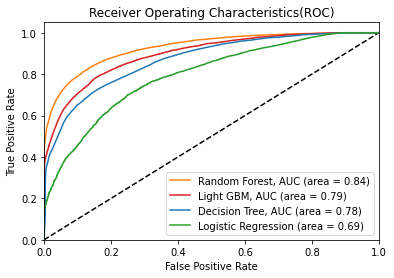

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
logit_roc_auc = roc_auc_score(y_testlr, logreg.predict(X_test_lr))
fpr2, tpr2, thresholds = roc_curve(y_testlr, logreg.predict_proba(X_test_lr)[:,1])
lgb_roc_auc = roc_auc_score(y_test_lg, model.predict(x_test_lg))
fpr3, tpr3, thresholds = roc_curve(y_test_lg, model.predict_proba(x_test_lg)[:,1])
rf_roc_auc = roc_auc_score(y_test_rf, rf.predict(X_test_rf))
fpr4, tpr4, thresholds = roc_curve(y_test_rf, rf.predict_proba(X_test_rf)[:,1])
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr4, tpr4, color='tab:orange',label='Random Forest, AUC (area = %0.2f)' % rf_roc_auc)
plt.plot(fpr3, tpr3, 'tab:red',label= "Light GBM, AUC (area = %0.2f)"% lgb_roc_auc)
plt.plot(fpr, tpr, 'tab:blue',label= "Decision Tree, AUC (area = %0.2f)"% dt_roc_auc)
plt.plot(fpr2, tpr2, 'tab:green',  label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics(ROC)')
plt.legend(loc="lower right")
plt.savefig('LGB_ROC')
plt.show()

# **Feature Reduction (PCA for quantitative variables)** -- ignore

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
cereals_df = pd.read_csv('../dmba/Cereals.csv')
cereals_df.head()
pcs = PCA(n_components=5)
pcs.fit(cereals_df[['calories', 'rating', 'sugars','fat', 'carbo']])
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5']
pcsSummary.round(4)
#transform the dataset
scores = pd.DataFrame(pcs.transform(cereals_df[['calories', 'rating', 'sugars','fat', 'carbo']]), 
                      columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
scores.head()

In [ ]:
####################

In [ ]:
# Basic
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
# Following this 
# https://towardsdatascience.com/machine-learning-step-by-step-6fbde95c455a

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

features_PCA = ['Avg Temperature (° F)', 'LeadTime',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies',  'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
      'BookingChanges', 'Agent',
      'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']

target_PCA = 'IsCanceled'

X = data[features_PCA]  
y = data[target_PCA] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state = 2020, stratify=y)

# Separating out the features
# x = data.loc[:, features_PCA].values
# Separating out the target
# y = data.loc[:,target_PCA].values
# Standardizing the features
# x = StandardScaler().fit_transform(x)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

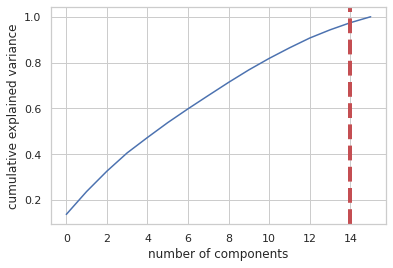

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.137448,0.137448
1,0.237283,0.099835
2,0.326096,0.088813
3,0.405932,0.079836
4,0.473127,0.067195
5,0.538068,0.064941
6,0.598359,0.060292
7,0.656352,0.057993
8,0.713684,0.057332
9,0.768286,0.054602


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=16)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=14, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df)

In [ ]:
pca = PCA(n_components=10)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [ ]:
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, columns=features_PCA, index=pca_dims)
pca_test_df.head(10).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9
Avg Temperature (° F),0.305987,0.155807,0.028426,0.451793,0.091117,-0.142254,0.256158,-0.489133,-0.096778,0.120840
LeadTime,0.212760,-0.370090,0.219014,0.364436,0.255113,0.018581,-0.002260,-0.171325,0.043891,-0.048105
StaysInWeekendNights,0.315311,-0.010750,0.509465,-0.270001,-0.174247,-0.117122,-0.051001,0.032627,-0.004345,0.151460
StaysInWeekNights,0.325204,-0.048711,0.529048,-0.228437,-0.064488,-0.135292,-0.083894,0.037787,-0.035192,0.116966
Adults,0.325323,0.037664,-0.085991,0.141901,-0.136856,0.333473,-0.257598,-0.081213,0.171951,-0.103168
Children,0.206920,0.352655,-0.124089,0.075404,0.064856,-0.387061,-0.019098,0.590068,0.045552,0.052018
Babies,0.051582,0.145414,0.044840,-0.149504,0.472366,0.497098,0.381576,0.153010,-0.062670,0.532555
IsRepeatedGuest,-0.344246,0.292336,0.304904,0.206654,-0.059627,0.015019,-0.092715,-0.060879,-0.261614,-0.001619
PreviousCancellations,-0.096781,-0.031264,0.255157,0.401070,-0.086990,0.200848,0.169229,0.352075,0.640182,-0.061206
PreviousBookingsNotCanceled,-0.270764,0.280739,0.375625,0.315016,-0.096855,0.090426,-0.062351,0.081867,-0.197110,-0.063260
